In [48]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms.autoaugment import AutoAugmentPolicy
from torchvision.transforms import Compose, \
    CenterCrop, RandomCrop, ToTensor, Resize, FiveCrop, AutoAugment, TrivialAugmentWide

from moths.datasets import LabelHierarchyImageFolder
from moths.label_hierarchy import label_hierarchy_from_file

ROOT_PATH = Path("/home/kay/projects/moths/test_data/source_data")
HIERARCHY_PATH = Path("/home/kay/projects/moths/data/family.csv")

In [49]:
tfs = Compose([
    TrivialAugmentWide(),
    Resize(224),
    RandomCrop(224, pad_if_needed=True),
    ToTensor()
])

# tfs = Compose([
#     FiveCrop(224),
#     ToTensor()
# ])

In [50]:
hierarchy = label_hierarchy_from_file(HIERARCHY_PATH, ROOT_PATH, 0)

In [51]:
ds = LabelHierarchyImageFolder(ROOT_PATH, hierarchy, tfs)
len(ds)

214

In [52]:
dl = DataLoader(
    ds,
    batch_size=9,
    num_workers=0,
    pin_memory=False,
    shuffle=True,
)

In [53]:
batch_images, batch_labels = next(iter(dl))
batch_images.shape

torch.Size([9, 3, 224, 224])

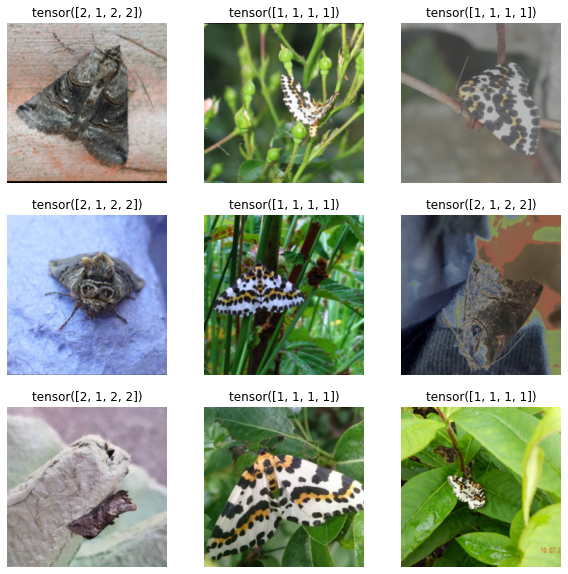

In [54]:
plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(zip(batch_images, batch_labels)):
    ax = plt.subplot(3, 3, i + 1)
    image = np.moveaxis(image.numpy(), 0, 2)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")